# ***Installation***

In [1]:
!pip install pycaret

     |████████████████████████████████| 266 kB 12.8 MB/s 
     |████████████████████████████████| 14.6 MB 110 kB/s 
     |████████████████████████████████| 2.0 MB 39.3 MB/s 
     |████████████████████████████████| 1.3 MB 50.2 MB/s 
     |████████████████████████████████| 271 kB 54.3 MB/s 
     |████████████████████████████████| 56 kB 5.1 MB/s 
     |████████████████████████████████| 111 kB 48.7 MB/s 
     |████████████████████████████████| 261 kB 48.4 MB/s 
     |████████████████████████████████| 1.7 MB 50.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 167 kB 45.8 MB/s 
     |████████████████████████████████| 80 kB 9.2 MB/s 
     |████████████████████████████████| 6.8 MB 47.7 MB/s 
     |████████████████████████████████| 675 kB 41.7 MB/s 
     |████████████████████████████████| 636 kB 46.9 MB/s 
     |█████████████████

# ***Importing libraries***

In [2]:
from pycaret.classification import * 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

# ***Loading Data***

---



In [3]:
train = pd.read_csv("iris_train.csv")
test = pd.read_csv("iris_test.csv")

In [4]:
train.drop("Unnamed: 0",axis=1,inplace=True)
test.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:

train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [6]:
test.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.9,3.0,4.2,1.5,1
1,6.9,3.1,5.4,2.1,2
2,5.1,3.3,1.7,0.5,0
3,6.0,3.4,4.5,1.6,1
4,5.5,2.5,4.0,1.3,1


In [7]:
train.shape

(120, 5)

In [8]:
test.shape

(30, 5)

In [9]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal_length,120.0,5.845000,0.868578,4.4,5.075,5.8,6.425,7.9
sepal_width,120.0,3.065000,0.427156,2.0,2.800,3.0,3.300,4.4
petal_length,120.0,3.739167,1.822100,1.0,1.500,4.4,5.100,6.9
petal_width,120.0,1.196667,0.782039,0.1,0.300,1.3,1.800,2.5
species,120.0,1.000000,0.840168,0.0,0.000,1.0,2.000,2.0


In [10]:
test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal_length,30.0,5.836667,0.653628,4.3,5.500,5.75,6.300,7.1
sepal_width,30.0,3.010000,0.463383,2.2,2.725,3.00,3.300,4.2
petal_length,30.0,3.836667,1.537459,1.1,2.300,4.25,4.900,5.9
petal_width,30.0,1.206667,0.694775,0.1,0.625,1.30,1.575,2.5
species,30.0,1.000000,0.742781,0.0,0.250,1.00,1.750,2.0


# ***Setting Up Environment***

The transformation pipeline is created to prepare the data for modeling and deployment, after the setup() function is initiated. setup() must be called before any other function is executed in PyCaret. There are 2 mandatory parameters for setup(): a pandas DataFrame and the name of the label column

In [11]:
train.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [12]:
 #setting the experiment
 experiment = setup(data = train, target='species')  

,Description,Value
0,session_id,4809
1,Target,species
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(120, 5)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


# ***Comparing All Models***

In [15]:
# all the models that are available are 
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [14]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9764,0.9963,0.9722,0.9823,0.9749,0.9638,0.9675,0.018
nb,Naive Bayes,0.9653,0.9900,0.9667,0.9740,0.9643,0.9476,0.9528,0.017
lr,Logistic Regression,0.9639,0.9900,0.9611,0.9729,0.9620,0.9448,0.9505,0.328
qda,Quadratic Discriminant Analysis,0.9639,0.9963,0.9556,0.9729,0.9612,0.9443,0.9501,0.019
rf,Random Forest Classifier,0.9528,0.9944,0.9500,0.9646,0.9506,0.9281,0.9354,0.472
gbc,Gradient Boosting Classifier,0.9528,0.9833,0.9500,0.9646,0.9506,0.9281,0.9354,0.230
et,Extra Trees Classifier,0.9528,0.9963,0.9500,0.9646,0.9506,0.9281,0.9354,0.471
lightgbm,Light Gradient Boosting Machine,0.9528,0.9689,0.9500,0.9646,0.9506,0.9281,0.9354,0.085
knn,K Neighbors Classifier,0.9514,0.9900,0.9500,0.9635,0.9492,0.9257,0.9334,0.120
dt,Decision Tree Classifier,0.9403,0.9533,0.9389,0.9552,0.9377,0.9091,0.9183,0.018


# ***Creating Model***

In [16]:
#Since lda has the highest R2 Score, we’ll use that:

lda = create_model('lda')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8889,0.9630,0.8889,0.9167,0.8857,0.8333,0.8492
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.8750,1.0000,0.8333,0.9062,0.8631,0.8049,0.8260
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


# ***Tuning Model***

In [17]:
tuned_lda = tune_model(lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8889,0.9630,0.8889,0.9167,0.8857,0.8333,0.8492
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.8750,1.0000,0.8333,0.9062,0.8631,0.8049,0.8260
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [18]:
print(tuned_lda)

LinearDiscriminantAnalysis(n_components=None, priors=None,
                           shrinkage='empirical', solver='lsqr',
                           store_covariance=False, tol=0.0001)


# ***Plotting Model***

***Residual Plot***

In [19]:
plot_model?

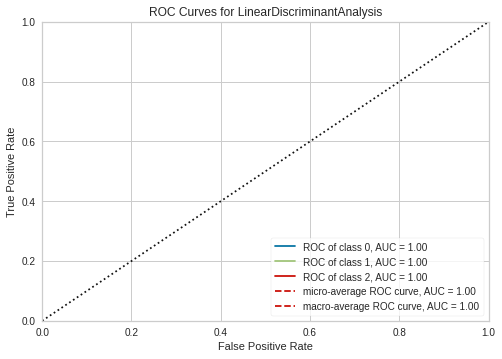

In [20]:
plot_model(tuned_lda)

***Prediction Error Plot***

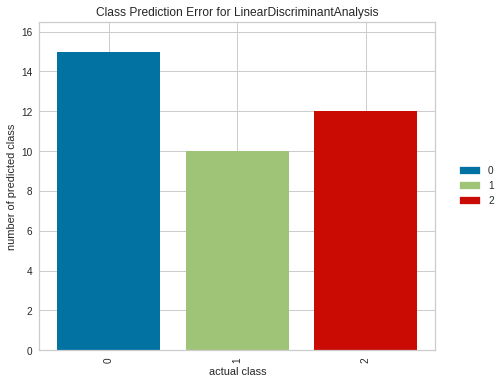

In [21]:
plot_model(tuned_lda, plot = 'error')

***Confusion Matrix***

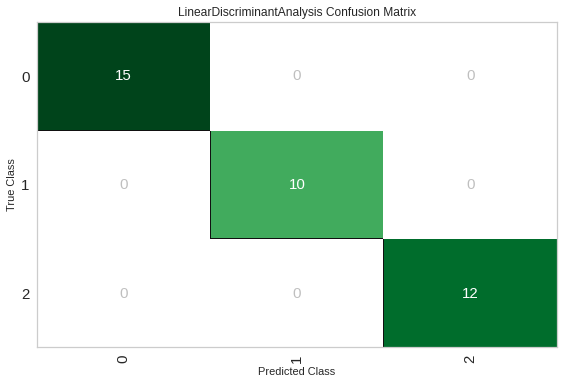

In [22]:
plot_model(tuned_lda, plot = 'confusion_matrix') 

# ***Model Evaluation***

In [23]:
evaluate_model(tuned_lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# ***Finalizing Model for Deployment***

In [24]:
final_lda = finalize_model(tuned_lda)
print(final_lda)

LinearDiscriminantAnalysis(n_components=None, priors=None,
                           shrinkage='empirical', solver='lsqr',
                           store_covariance=False, tol=0.0001)


In [25]:
predict_model(final_lda)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,sepal_length,sepal_width,petal_length,petal_width,species,Label,Score
0,5.1,3.7,1.5,0.4,0,0,1.0000
1,5.0,3.6,1.4,0.2,0,0,1.0000
2,4.8,3.1,1.6,0.2,0,0,1.0000
3,5.4,3.9,1.3,0.4,0,0,1.0000
4,6.0,2.2,5.0,1.5,2,2,0.7707
5,6.7,3.0,5.2,2.3,2,2,1.0000
6,5.7,2.9,4.2,1.3,1,1,0.9999
7,6.9,3.1,5.1,2.3,2,2,0.9998
8,5.5,2.4,3.8,1.1,1,1,1.0000
9,6.7,3.3,5.7,2.1,2,2,0.9999


# ***Prediction on Test Data***

In [26]:
predictions = predict_model(final_lda, data=test)
predictions.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Label,Score
0,5.9,3.0,4.2,1.5,1,1,0.9992
1,6.9,3.1,5.4,2.1,2,2,0.9994
2,5.1,3.3,1.7,0.5,0,0,1.0000
3,6.0,3.4,4.5,1.6,1,1,0.9936
4,5.5,2.5,4.0,1.3,1,1,0.9998


# ***Saving Model***

In [27]:
save_model(final_lda,'Final LDA Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='species',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                 ('dummy', Dummify(target='species')),
                 ('fix_perfect', Remove_100(target='species')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 (